<a href="https://colab.research.google.com/github/diversifyguy/ML_Blog/blob/master/2021_06_22_Blastoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blastoff
> My first blog post.

- toc: true 
- badges: true
- comments: true
- categories: []
- image: 

# Blastoff

This is my first blog post. I've become interested in data science, machine learning, and artificial intelligence, and now here I am blogging about it. My hope is that blogging will help clarify my thoughts, sharpen my ideas, and elicit feedback from others. Thank you for your participation in this process!


As a blogger, my goal is to heed Professor James Miller's three pieces of writing advice: *be clear, be concise, and be interesting -- in that order of importance.*


> twitter: https://twitter.com/JimDMiller/status/1376642170694860805?s=20

So without further ado, please wish me luck on this journey, and feel free to DM me anytime on Twitter @jjhoffstein. Thank you!!

# What Classes Am I Taking?

My plan is two take two classes: [Stanford's CSS 229](https://https://see.stanford.edu/Course/CS229), taught by Andrew Ng; and [fast.ai's Practical Deep Learning for Coders](https://course.fast.ai/), taught by Jeremy Howard. The former is more of a theory course, the latter is more of a practical course.

If you're interested in learning more about Andrew Ng and his mission, I recommend this video:

> youtube: https://youtu.be/0jspaMLxBig


If you're interested in Jeremy Howard and his mission, I recommend this video: 

> youtube: https://youtu.be/2uygOz2fORo

# Without Further Ado

Let's get started!

In [1]:
#hide
%%bash

# install required system dependencies
apt-get install -y xvfb x11-utils

# install required python dependencies (might need to install additional gym extras depending)
pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

Reading package lists...
Building dependency tree...
Reading state information...
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.


In [2]:
#hide
import pyvirtualdisplay


_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()

In [3]:
#hide
import typing

import numpy as np


# represent states as arrays and actions as ints
State = np.array
Action = int

# agent is just a function! 
Agent = typing.Callable[[State], Action]


def uniform_random_policy(state: State,
                          number_actions: int,
                          random_state: np.random.RandomState) -> Action:
    """Select an action at random from the set of feasible actions."""
    feasible_actions = np.arange(number_actions)
    probs = np.ones(number_actions) / number_actions
    action = random_state.choice(feasible_actions, p=probs)
    return action


def make_random_agent(number_actions: int,
                      random_state: np.random.RandomState = None) -> Agent:
    """Factory for creating an Agent."""
    _random_state = np.random.RandomState() if random_state is None else random_state
    return lambda state: uniform_random_policy(state, number_actions, _random_state)

In [4]:
#hide
import gym
import matplotlib.pyplot as plt
from IPython import display


def simulate(agent: Agent, env: gym.Env) -> None:
    state = env.reset()
    img = plt.imshow(env.render(mode='rgb_array'))
    done = False
    while not done:
        action = agent(state)
        img.set_data(env.render(mode='rgb_array')) 
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, done, _ = env.step(action)       
    env.close()

In [5]:
#hide
lunar_lander_v2 = gym.make('LunarLander-v2')
_ = lunar_lander_v2.seed(42)

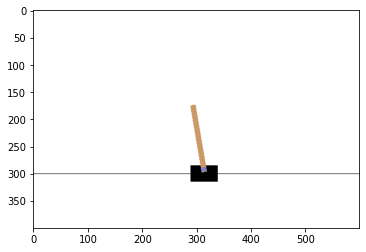

In [7]:
#hide
import matplotlib.pyplot as plt
import gym
from IPython import display
%matplotlib inline

env = gym.make('CartPole-v0')
env.reset()

for i in range(25):
   plt.imshow(env.render(mode='rgb_array'))
   display.display(plt.gcf())    
   display.clear_output(wait=True)
   env.step(env.action_space.sample()) # take a random action

env.close()